In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fid_nn_list = []
fid_nn_mean_list = []


fid_nn_list_low = []
fid_nn_mean_list_low = []

fid_mle_list = []
fid_mle_mean_list = []
n_shots = [128, 256, 512, 1024, 2048, 4096, 8192] #, 4096]
for shots in  n_shots:
    print(shots)
    fm_list, fm_av, model_dms, params_list = pd.read_pickle(
        # f'../low_shots_training/test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_0.3394171312620001_test_shots_{shots}_train_with_shots_ideal.pickle')
        f'../low_shots_training/test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_0.3394171312620001_test_shots_{shots}_train_with_shots_ideal_LAST.pickle')
    mle_fids_list, mle_av, dm_target, dm_fitted = pd.read_pickle(
        f'../../mle_outputs/convoluted_mle_fids_list_fids_mean_shots_{shots}_n_size_500.pickle')

    fm_list_low, fm_av_low, model_dms_low, params_list_low = pd.read_pickle(
        # f'../low_shots_training/test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_Eng_test_shots_{shots}_train_with_shots_{shots}.pickle')
        f'../low_shots_training/test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_Eng_test_shots_{shots}_train_with_shots_{shots}_LAST.pickle')
    # if shots == 1024:
    #     fid_nn_list.append(fm_list[0][-1])
    # else:
    fid_nn_list.append(fm_list)
    fid_nn_mean_list.append(fm_av)

    fid_nn_list_low.append(fm_list_low)
    fid_nn_mean_list_low.append(fm_av_low)

    fid_mle_list.append(mle_fids_list)
    fid_mle_mean_list.append(mle_av)

fid_ideal = np.squeeze(fid_nn_list).tolist()
fid_ideal_m = np.squeeze(fid_nn_list).mean(axis=1)
fid_shots = np.squeeze(fid_nn_list_low).tolist()
fid_shots_m = np.squeeze(fid_nn_list_low).mean(axis=1)
fid_mle = np.squeeze(fid_mle_list)[:,:400].tolist()
fid_mle_m = np.squeeze(fid_mle_list)[:,:400].mean(axis=1)

128
256
512
1024
2048
4096
8192


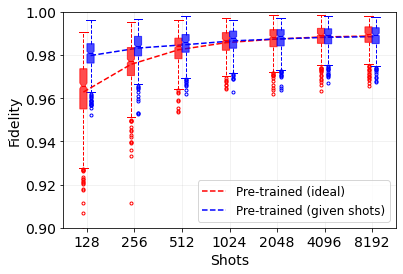

In [6]:
fids_ideal_plot = plt.boxplot(fid_ideal,
            notch=True,  # notch shape
            positions=np.array(range(len(fid_ideal)))*2.0-0.15,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            showfliers=True,
            flierprops=dict(marker='o', markeredgecolor='r', markersize=3),
            widths=0.3,
            # whis=[1,99],
            showmeans=False,
            meanline=False,
            medianprops=dict(color='r'),
            # meanprops=dict(marker='', markerfacecolor='k', markeredgecolor='k'),
            # flierprops=None, #dict(marker='+', markerfacecolor='royalblue', markersize=6,
            # #         markeredgecolor='royalblue', linestyle='none') ,
            capprops=dict(linestyle='-', linewidth=1, color='r'),
            whiskerprops=dict(linestyle = '--',color='r'),
            labels=n_shots)  # will be used to label x-ticks
fids_shots_plot = plt.boxplot(fid_shots,
            notch=True,  # notch shape
            positions=np.array(range(len(fid_shots)))*2.0+0.15,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            showfliers=True,
            flierprops=dict(marker='o', markeredgecolor='b', markersize=3),
            widths=0.3,
            # whis=[1,99],
            showmeans=False,
            meanline=False,
            medianprops=dict(color='b'),
            # meanprops=dict(marker='', markerfacecolor='k', markeredgecolor='k'),
            # flierprops=None, #dict(marker='+', markerfacecolor='royalblue', markersize=6,
            # #         markeredgecolor='royalblue', linestyle='none') ,
            capprops=dict(linestyle='-', linewidth=1, color='b'),
            whiskerprops=dict(linestyle = '--',color='b'),
            labels=n_shots)  # will be used to label x-ticks
# fids_mle_plot = plt.boxplot(fid_mle,
#             notch=True,  # notch shape
#             positions=np.array(range(len(fid_mle)))*2.0+0.3,
#             vert=True,  # vertical box alignment
#             patch_artist=True,  # fill with color
#             showfliers=True,
#             flierprops=dict(marker='o', markeredgecolor='g', markersize=3),
#             widths=0.3,
#             # whis=[1,99],
#             showmeans=False,
#             meanline=False,
#             medianprops=dict(color='g'),
#             # meanprops=dict(marker='', markerfacecolor='k', markeredgecolor='k'),
#             # flierprops=None, #dict(marker='+', markerfacecolor='royalblue', markersize=6,
#             # #         markeredgecolor='royalblue', linestyle='none') ,
#             capprops=dict(linestyle='-', linewidth=1, color='g'),
#             whiskerprops=dict(linestyle = '--',color='g'),
#             labels=n_shots)  # will be used to label x-ticks

plt.plot(np.arange(0, len(n_shots) * 2, 2) - 0.15, fid_ideal_m, 'r--', label='Pre-trained (ideal)')
plt.plot(np.arange(0, len(n_shots) * 2, 2) + 0.15, fid_shots_m, 'b--', label='Pre-trained (given shots)')
# plt.plot(np.arange(0, len(n_shots) * 2, 2) + 0.3, fid_mle_m, 'g--', label='MLE')

cols = [[1,0,0,0.7],
        [0,0,1,0.7],
        [0,.5,0,0.7]]

[fids_ideal_plot['boxes'][i].set_facecolor(cols[0]) for i in range(len(n_shots))]
[fids_ideal_plot['boxes'][i].set_color(cols[0]) for i in range(len(n_shots))]
for cap in fids_ideal_plot['caps']:
    cap.set_xdata(cap.get_xdata()+ np.array([-.10,.10]))

[fids_shots_plot['boxes'][i].set_facecolor(cols[1]) for i in range(len(n_shots))]
[fids_shots_plot['boxes'][i].set_color(cols[1]) for i in range(len(n_shots))]
for cap in fids_shots_plot['caps']:
    cap.set_xdata(cap.get_xdata()+ np.array([-.10,.10]))

# [fids_mle_plot['boxes'][i].set_facecolor(cols[2]) for i in range(len(n_shots))]
# [fids_mle_plot['boxes'][i].set_color(cols[2]) for i in range(len(n_shots))]
# for cap in fids_mle_plot['caps']:
#     cap.set_xdata(cap.get_xdata()+ np.array([-.10,.10]))

fs = 14
plt.grid(alpha=0.2)
plt.xlabel(r'Shots', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)
# plt.legend(fontsize='small')
plt.legend(fontsize='large')
# plt.xticks(np.arange(0, 3, .5), fontsize=fs)
plt.xticks(range(0, len(n_shots) * 2, 2), n_shots, fontsize=fs)
plt.yticks(fontsize=fs)

# plt.axis([-0.7e6, 6e6, 0.55, 1.02])
plt.subplots_adjust(bottom=0.13, left=0.13)
plt.axis([-1, 13, 0.9, 1.])
# plt.subplots_adjust(bottom=0.6, left=0.6)

# plt.savefig('fid_vs_params.svg', dpi=600)
# plt.savefig('fids_shots_eng_no_mle.svg', dpi=600)
# plt.savefig('fids_shots_eng_no_mle.png', dpi=600)
# plt.savefig('fid_vs_params_zoomed.svg', dpi=600)

plt.show()